In [5]:
# import everything needed for text wordclouds
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import nltk
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
# might have to run 'python -m spacy download en_core_web_sm' in terminal

In [6]:
# read in csv
df = pd.read_csv('../group-project-2/original dataset/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# drop NAs
df.fillna(' ',inplace=True)
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [8]:
# combine text fields to one column
df['all_text'] = df[['title',
                     'location',
                     'salary_range',
                     'company_profile',
                     'description',
                     'requirements',
                     'benefits',
                     'employment_type',
                     'required_experience',
                     'required_education',
                     'industry',
                     'function',
                     'department']].apply(lambda x: ' '.join(x), axis=1)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,all_text
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York We're Food..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [9]:
# drop old text columns
df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department',
                'job_id'], inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,all_text
0,0,1,0,0,"Marketing Intern US, NY, New York We're Food..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [10]:
# download the stopwords from NLTK
nltk.download('stopwords')

# load spacy model and set the stop words
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdp15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# insert tqdm to monitor progress
tqdm.pandas()

# define function to preprocess (standardizing the text)
def preprocess_text(text):
    # tokenize and remove stopwords using spacy
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    return ' '.join(tokens)
    
# apply preprocess function
df['cleaned_text'] = df['all_text'].progress_apply(preprocess_text)

100%|██████████| 17880/17880 [16:27:34<00:00,  3.31s/it]       


In [12]:
# separate text based on the fradulent column
text_non_fraudulent = df[df['fraudulent'] == 0]['cleaned_text'].str.cat(sep=' ')
text_fraudulent = df[df['fraudulent'] == 1]['cleaned_text'].str.cat(sep=' ')

In [13]:
# read in masks for the word clouds
check_mask = np.array(Image.open("../downloads/check.png"))
x_mask = np.array(Image.open("../downloads/X.png"))

In [14]:
# create word clouds
wc_non_fraudulent = WordCloud(background_color='white', mask=check_mask, contour_width=1, contour_color='black').generate(text_non_fraudulent)
wc_fraudulent = WordCloud(background_color='white', mask=x_mask, contour_width=1, contour_color='black').generate(text_fraudulent)

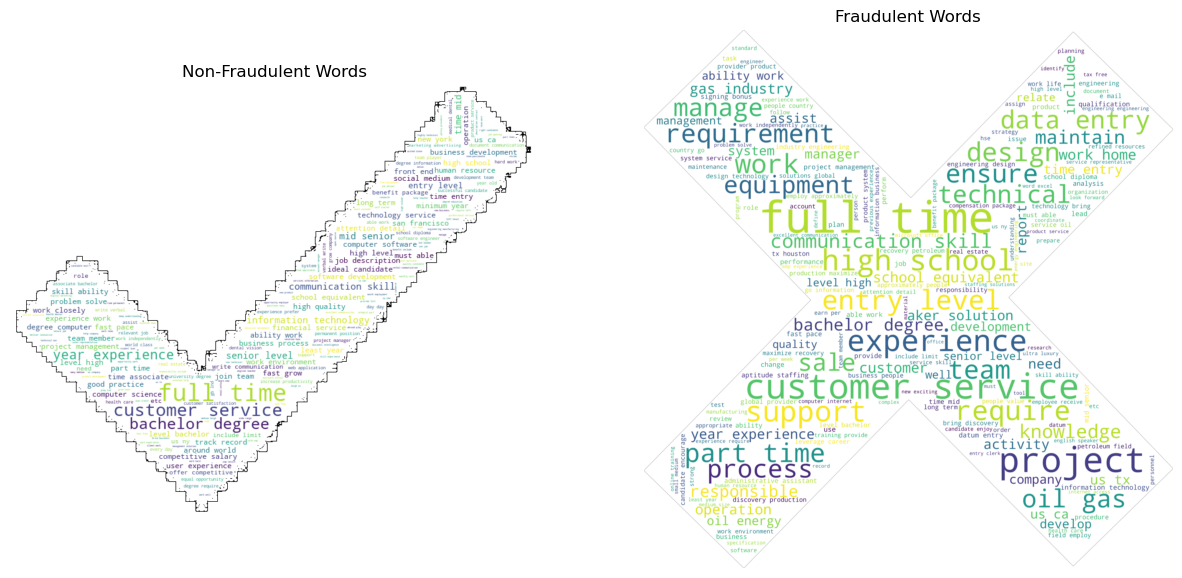

In [15]:
# display word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].imshow(wc_non_fraudulent, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Non-Fraudulent Words')

axes[1].imshow(wc_fraudulent, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Fraudulent Words')

plt.show()